In this notebook we will analyze the difference between pickups of yellow, green and uber taxi services.

In [1]:
import pandas as pd
import geopandas as gpd

In [3]:
def load_green_trips_data():
    return pd.read_csv("Dataset/Dataset/green_trips.csv")

In [4]:
def load_yellow_trips_data():
    return pd.read_csv("Dataset/Dataset/yellow_trips.csv")

In [5]:
def load_uber_trips_data_2014():
    return pd.read_csv("Dataset/Dataset/uber_trips_2014.csv")

In [2]:
def load_uber_trips_data_2015():
    return pd.read_csv("Data/uber_nta3_2015.csv")

In [7]:
green_trips_data = load_green_trips_data()

In [8]:
yellow_trips_data = load_yellow_trips_data()

In [9]:
uber_trips_data_2014 = load_uber_trips_data_2014()

In [3]:
uber_trips_data_2015 = load_uber_trips_data_2015()

In [4]:
uber_trips_data_2015.shape

(14270479, 9)

In [5]:
uber_trips_data_2015.head()

,Unnamed: 0,pickup_datetime,pickup_location_id,affiliate_base,pickup_borough,pickup_ntaname,service_zone,pickup_ntacode,geometry
0,0,2015-05-17 09:47:00,141,B02617,Manhattan,Lenox Hill West,Yellow Zone,MN31,POINT (-73.95508804893075 40.76496428316414)
1,1,2015-05-17 09:47:00,65,B02617,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,POINT (-73.98598668768781 40.6929272291251)
2,2,2015-05-17 09:47:00,100,B02617,Manhattan,Garment District,Yellow Zone,MN13,POINT (-73.99902072333019 40.74758546940266)
3,3,2015-05-17 09:47:00,80,B02774,Brooklyn,East Williamsburg,Boro Zone,BK90,POINT (-73.93679701804409 40.71536855281771)
4,4,2015-05-17 09:47:00,90,B02617,Manhattan,Flatiron,Yellow Zone,MN13,POINT (-73.99902072333019 40.74758546940266)


In [63]:
green_pickup_location = green_trips_data[["pickup_longitude", "pickup_latitude"]].copy()

In [106]:
yellow_pickup_location = yellow_trips_data[["pickup_longitude", "pickup_latitude"]].copy()

In [41]:
uber_pickup_location_2014 = uber_trips_data_2014[["pickup_longitude", "pickup_latitude"]].copy()

In [6]:
uber_pickup_location_2015 = uber_trips_data_2015[["geometry"]].copy()

In [64]:
green_pickup_location.head()

,pickup_longitude,pickup_latitude
0,-73.953545,40.811172
1,-73.946709,40.714321
2,-73.957626,40.718094
3,-73.949501,40.713997
4,-73.944092,40.672195


In [107]:
yellow_pickup_location.head()

,pickup_longitude,pickup_latitude
0,-74.006033,40.706284
1,-73.979558,40.749357
2,-73.956453,40.775307
3,-73.987212,40.757850
4,-73.974292,40.755397


In [10]:
uber_pickup_location.head()

,pickup_longitude,pickup_latitude
0,-73.9549,40.7690
1,-74.0345,40.7267
2,-73.9873,40.7316
3,-73.9776,40.7588
4,-73.9722,40.7594


In [8]:
from sklearn.model_selection import train_test_split

In [98]:
green_pickup_location_train, green_pickup_location_test = train_test_split(green_pickup_location, test_size=0.2, random_state=42)

In [108]:
yellow_pickup_location_train, yellow_pickup_location_test = train_test_split(yellow_pickup_location, test_size=0.2, random_state=42)

In [12]:
uber_pickup_location_train, uber_pickup_location_test = train_test_split(uber_pickup_location, test_size=0.2, random_state=42)

In [10]:
uber_pickup_location_train15, uber_pickup_location_test15 = train_test_split(uber_pickup_location_2015, test_size=0.2, random_state=42)

In [66]:
green_pickup_location_train.shape

(2871238, 2)

In [109]:
yellow_pickup_location_train.shape

(6379247, 2)

In [13]:
uber_pickup_location_train.shape

(3627461, 2)

In [67]:
green_pickup_location_test.shape

(717810, 2)

In [110]:
yellow_pickup_location_test.shape

(1594812, 2)

In [14]:
uber_pickup_location_test.shape

(906866, 2)

In [68]:
green_pickup_location_test.head()

,pickup_longitude,pickup_latitude
2563691,-73.890472,40.746838
2775383,-73.919350,40.759125
1471058,-73.992371,40.695004
2845421,-73.936653,40.830143
3452055,-73.966339,40.804768


In [111]:
yellow_pickup_location_test.head()

,pickup_longitude,pickup_latitude
3802809,-73.987740,40.749940
5670540,-73.990898,40.733967
7718922,-74.006378,40.733143
3518517,-73.953942,40.778920
2516979,-73.988680,40.774187


In [15]:
uber_pickup_location_test.head()

,pickup_longitude,pickup_latitude
255777,-73.9726,40.7588
2591794,-73.9724,40.7653
1384006,-73.9771,40.7444
530592,-73.7824,40.6449
3679163,-73.9798,40.7636


In [99]:
green_graph_dataset = green_pickup_location_test[(green_pickup_location_test["pickup_longitude"] < -73) & (green_pickup_location_test["pickup_longitude"] > -76)].copy()

In [112]:
yellow_graph_dataset = yellow_pickup_location_test[(yellow_pickup_location_test["pickup_longitude"] < -73) & (yellow_pickup_location_test["pickup_longitude"] > -76)].copy()

In [16]:
uber_graph_dataset = uber_pickup_location_test[(uber_pickup_location_test["pickup_longitude"] < -73) & (uber_pickup_location_test["pickup_longitude"] > -76)].copy()

In [11]:
# import fundamental plotting library in Python
import matplotlib.pyplot as plt

# Instruct jupyter to plot in the notebook
%matplotlib inline

In [13]:
nyc_shp = gpd.read_file("data/Neighborhood Tabulation Areas.geojson")

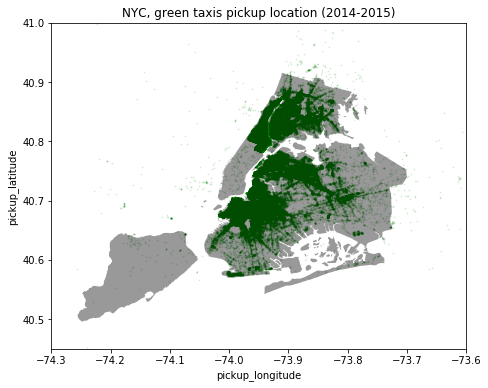

In [101]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlim([-74.3,-73.6])
ax.set_ylim([40.45,41])
ax.set_title("NYC, green taxis pickup location (2014-2015)")
green_graph_dataset.plot(s = 1, ax = ax, kind="scatter", x="pickup_longitude", y="pickup_latitude", color= "green" , alpha=0.1)
nyc_shp.plot(ax = ax, alpha = 0.4, color="black")


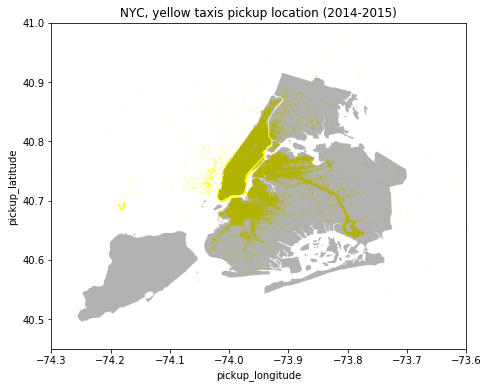

In [114]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlim([-74.3,-73.6])
ax.set_ylim([40.45,41])
ax.set_title("NYC, yellow taxis pickup location (2014-2015)")
yellow_graph_dataset.plot(s = 1, ax = ax, kind="scatter", x="pickup_longitude", y="pickup_latitude", color= "yellow" , alpha=0.1)
nyc_shp.plot(ax = ax, alpha = 0.3, color="black")

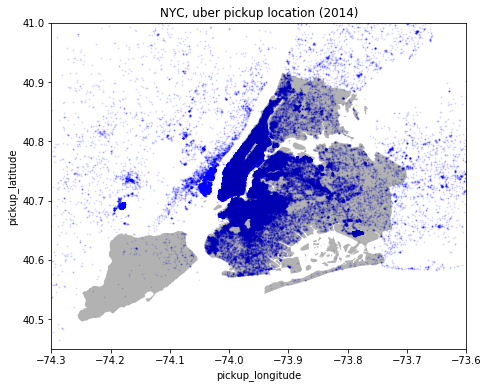

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlim([-74.3,-73.6])
ax.set_ylim([40.45,41])
ax.set_title("NYC, uber pickup location (2014)")
uber_graph_dataset.plot(s = 1, ax = ax, kind="scatter", x="pickup_longitude", y="pickup_latitude", color= "blue" , alpha=0.1)
nyc_shp.plot(ax = ax, alpha = 0.3, color="black")

We can notice that there is a difference in the distribution of pickups between the different services.

Yellow: It prefers the area of Manhatan and its surroundings, with a remarkable journey to J.F. Kennedy

Green: On the contrary to the yellow service, it has little activity in manhatan and much in bronx, and much of brooklyn and queens.

Uber: Like the yellow service, it has great activity in mahantan and surroundings, with the difference that it also moves a lot in other parts of the city and even shows great activity in the periphery, taking services in the state of New Jersey especially in the Newark airport area and other areas from NewYork state near the city.